In [1]:
import miepython as mie
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mie Scattering $Q_{ext}(a,\\lambda)$')

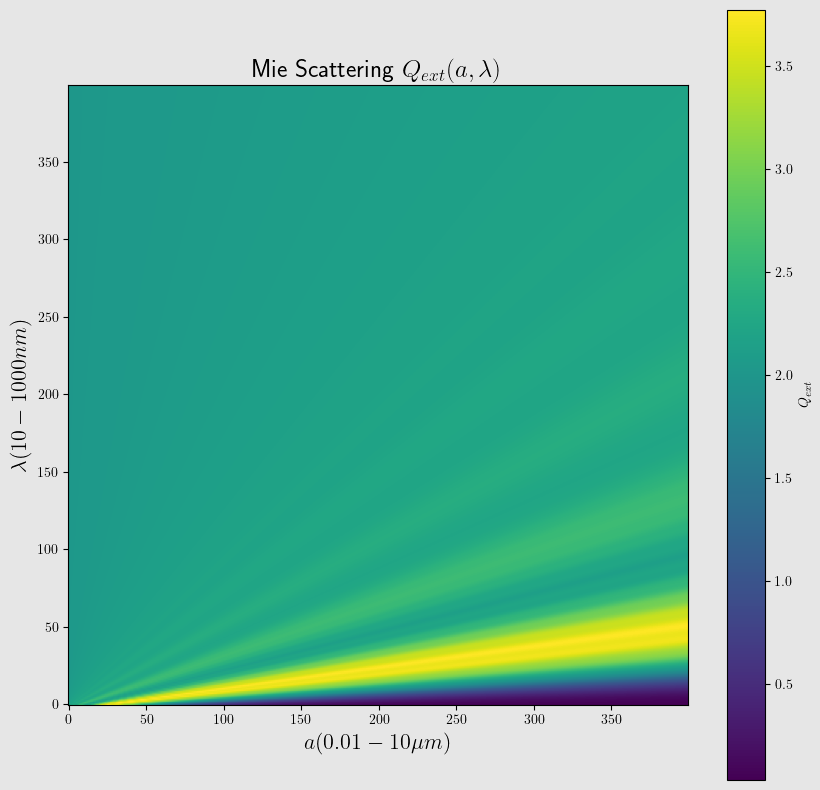

In [35]:
"""Playing around with mie scattering: runtime ~40 sec!!! ew"""


m = 1.5 - 0.05j #play with this for different types of dust (and more cool looking plots)

a = np.linspace(100,10000,400) #note particle size is in nm
lam = np.linspace(10,1000,400) #wavelength in nm

qext = []
qsca = []
qback = []
g = []

#compute coefficients for a bunch of grain sizes across EUV-NIR  
for i in range(len(a)):
    qext.append([mie.efficiencies(m, a[i], lam[j])[0] for j in range(len(lam))])

plt.rc('text', usetex=True)
plt.rcParams['figure.facecolor'] = '0.9'

plt.figure(figsize = (10,10))
plt.imshow(qext, origin = 'lower')
plt.colorbar(label = r"$Q_{ext}$")
# plt.plot(a,qext[0], label = r"$Q_{extinction}$")
# plt.plot(a,qsca[0], label = r"$Q_{scatter}$")
# plt.plot(a, qext[0] - qsca[0], label = "$Q_{abs}$")
plt.xlabel(r"$a(0.01 - 10\mu m)$", fontsize = 16)
plt.ylabel(r"$\lambda (10-1000 nm)$", fontsize = 16)
plt.title(r"Mie Scattering $Q_{ext}(a,\lambda)$", fontsize = 18)

In [48]:
"""Now let's start playing around with column densities"""
from scipy.integrate import dblquad
from scipy.integrate import quad
import miepython as mie
import numpy as np
import matplotlib.pyplot as plt

"""parameters"""
m = 1.5 - 0.05j
p = 3.1
q = 2.6352
h0 = 6.949025

"""functions (dust number density and total optical depth integrand)"""

# Dust number density (per unit n0)
def MurphyMOD(p,q,h0,a,h):
    return (1/a**p)*np.exp(-h*(a**q)/h0)

# optical depth integrad (Number density per n0 * Q)
def TAU_INTEG(h,a,p,q,h0,m,lam):
    Qext,Qsc,Qback,g = mie.efficiencies(m,a,lam)
    return MurphyMOD(p,q,h0,a/1000,h)*np.pi*((a*1e-3)**2)*Qext #a/1000 changes nm to microns

#integration limits
alim = (100,1000)#nm
hlim = (1,500000)#m


# compute tau/n0 for some wavelength
lam = 400
tau, error = dblquad(lambda h, a: TAU_INTEG(h, a, p,q,h0,m,lam), alim[0], alim[1], hlim[0], hlim[1])


print(tau)
# Using I/I0 = e^(-tau), plot the extinction fraction as a function of surface density per grain size n0 (n/cm^3/um^p-1) for a particular value of the integral tau/n0
n0 = np.linspace(0,1,10000)
def POWLAW(a,p):
    return (1/a**p)
M, merr = quad(lambda a: POWLAW(a,p),alim[0],alim[1])
M0 = M*n0

# plt.rc('text', usetex=True)
# plt.rcParams['axes.facecolor']='lemonchiffon'
# plt.rcParams['figure.facecolor'] = '0.9'

# plt.figure(figsize = (10,5))
# plt.plot(M0*1e12,np.exp(-tau*n0), label = r"$\frac{I_{obs}}{I_0} = e^{-\tau(\lambda,n_0)}$ , $\lambda = 400$nm", color = 'maroon')
# plt.ylim(0,1.2)
# plt.legend(fontsize = 12)
# plt.grid()
# plt.xlabel(r"$n_0$ $\bigg(\frac{n}{cm^3\mu m^{p-1}}\bigg)$", fontsize = 16)
# plt.ylabel(r"$\frac{I_{obs}}{I_0}$", fontsize = 16)
# plt.title(r"Extinction Fraction $\frac{I_{obs}}{I_0}$ vs. $n_0$ $\big( \frac{n}{cm^3\mu m^{p-1}} \bigg) $", fontsize = 18)



"""
What's left to do: 
- 1. Play with parameters and integration limits to determine
     parameter dependence
- 2. Choose an 'acceptable' recommended minimum extinction fraction

- 3. Compute tau vs n0 curve at a bunch of different wavelengths
     to draw conclusions about what surface densities are acceptable 
     (integrate n0*surface power law over grain size for total surface number density, 
     Perhaps plot tau vs. total surface density??)
"""
        
            
        
    

2769594.781672924


"\nWhat's left to do: \n- 1. Play with parameters and integration limits to determine\n     parameter dependence\n- 2. Choose an 'acceptable' recommended minimum extinction fraction\n\n- 3. Compute tau vs n0 curve at a bunch of different wavelengths\n     to draw conclusions about what surface densities are acceptable \n     (integrate n0*surface power law over grain size for total surface number density, \n     Perhaps plot tau vs. total surface density??)\n"

Text(0.5, 1.0, 'Extinction Fraction $\\frac{I_{obs}}{I_0}$ vs. $n_0$ $\\big( \\frac{n}{cm^3\\mu m^{p-1}} \\bigg) $')

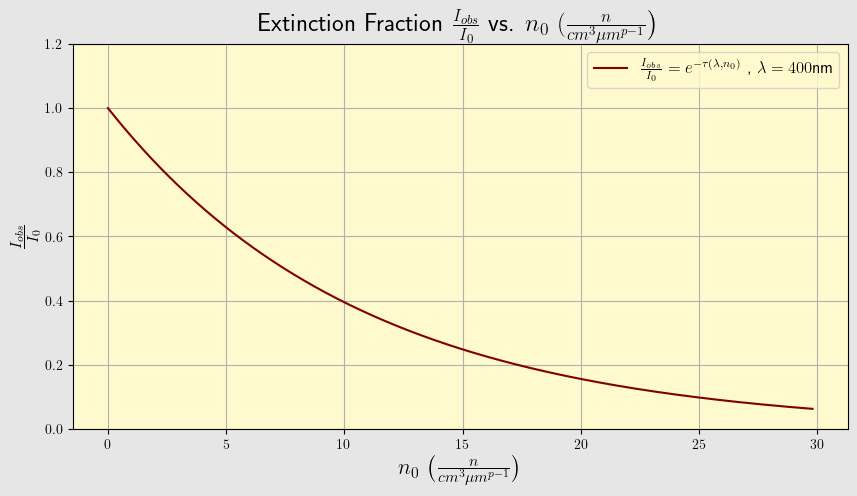

In [52]:
n0 = np.linspace(0,1e-6,10000)
def POWLAW(a,p):
    return (1/a**p)
M, merr = quad(lambda a: POWLAW(a,p),alim[0],alim[1])
M0 = M*n0

plt.rc('text', usetex=True)
plt.rcParams['axes.facecolor']='lemonchiffon'
plt.rcParams['figure.facecolor'] = '0.9'

plt.figure(figsize = (10,5))
plt.plot(M0*1e12,np.exp(-tau*n0), label = r"$\frac{I_{obs}}{I_0} = e^{-\tau(\lambda,n_0)}$ , $\lambda = 400$nm", color = 'maroon')
plt.ylim(0,1.2)
plt.legend(fontsize = 12)
plt.grid()
plt.xlabel(r"$n_0$ $\bigg(\frac{n}{cm^3\mu m^{p-1}}\bigg)$", fontsize = 16)
plt.ylabel(r"$\frac{I_{obs}}{I_0}$", fontsize = 16)
plt.title(r"Extinction Fraction $\frac{I_{obs}}{I_0}$ vs. $n_0$ $\big( \frac{n}{cm^3\mu m^{p-1}} \bigg) $", fontsize = 18)

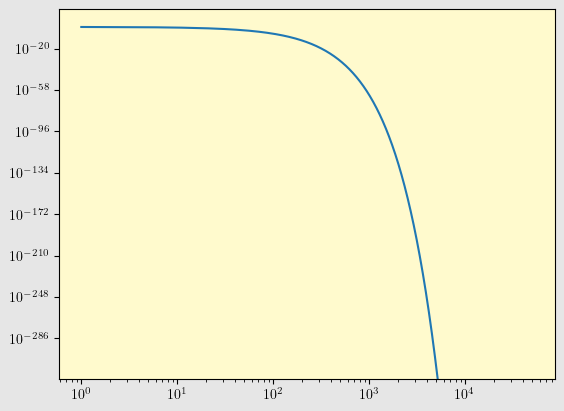

In [64]:
a = [1,0.1,0.01]#um
hs = np.linspace(1,50000,10000)
plt.plot(hs,MurphyMOD(p,q,h0,a[0],hs))
plt.xscale('log')
plt.yscale('log')